In [97]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
!pip install xlrd

In [98]:
df_can = pd.read_excel('un_migration_data_canada.xlsx', 
                       sheetname = 'Canada by Citizenship', 
                       skiprows = 20, 
                       skip_footer = 2)

df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [99]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
Type        195 non-null object
Coverage    195 non-null object
OdName      195 non-null object
AREA        195 non-null int64
AreaName    195 non-null object
REG         195 non-null int64
RegName     195 non-null object
DEV         195 non-null int64
DevName     195 non-null object
1980        195 non-null int64
1981        195 non-null int64
1982        195 non-null int64
1983        195 non-null int64
1984        195 non-null int64
1985        195 non-null int64
1986        195 non-null int64
1987        195 non-null int64
1988        195 non-null int64
1989        195 non-null int64
1990        195 non-null int64
1991        195 non-null int64
1992        195 non-null int64
1993        195 non-null int64
1994        195 non-null int64
1995        195 non-null int64
1996        195 non-null int64
1997        195 non-null int64
1998        195 non-null int64
1999        195 non-n

In [100]:
df_can.columns.values

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

In [101]:
df_can.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [102]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'],
           axis = 1, 
           inplace = True)

df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [103]:
df_can.rename(columns = {'OdName': 'Country', 
                         'AreaName': 'Continent', 
                         'RegName': 'Region'},
             inplace = True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [104]:
df_can.set_index('Country', inplace = True)

In [105]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [106]:
#create a column 'Total' which sums the migrants over the years
df_can['Total'] = df_can.sum(axis = 1)

In [107]:
df_can.isnull().sum()

Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [108]:
df_can.columns = list(map(str, df_can.columns))
years = list(map(str, range(1980, 2014)))

In [109]:
print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  2.1.0


In [110]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


In [111]:
mpl.style.use(['ggplot'])

In [112]:
haiti = df_can.loc['Haiti', years]
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

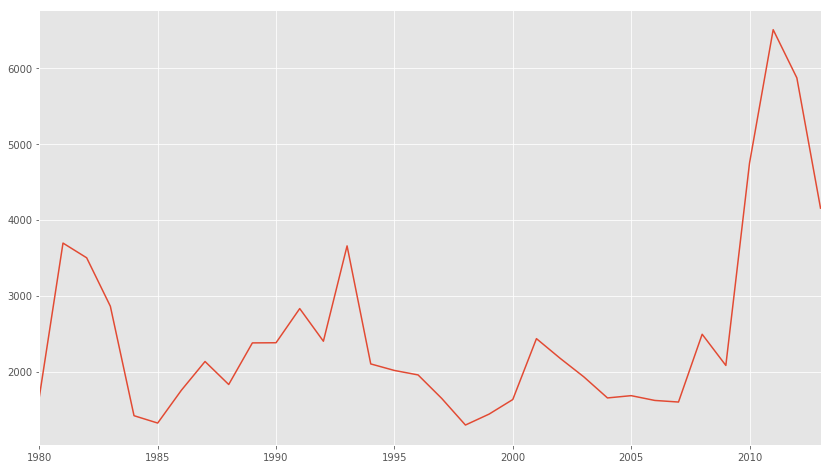

In [113]:
haiti.plot(kind = "line", figsize = (14, 8))

Text(0,0.5,'Number of Migrants')

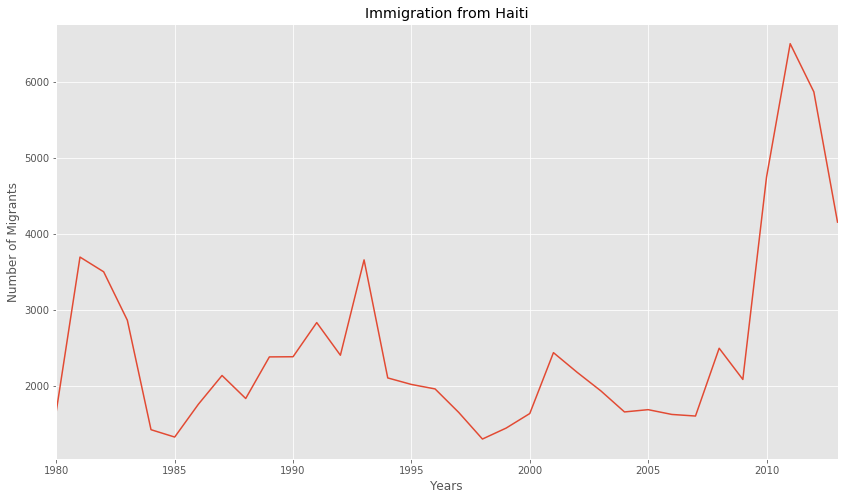

In [114]:
haiti.plot(kind = 'line', figsize = (14, 8))

plt.title("Immigration from Haiti")
plt.xlabel("Years")
plt.ylabel("Number of Migrants")

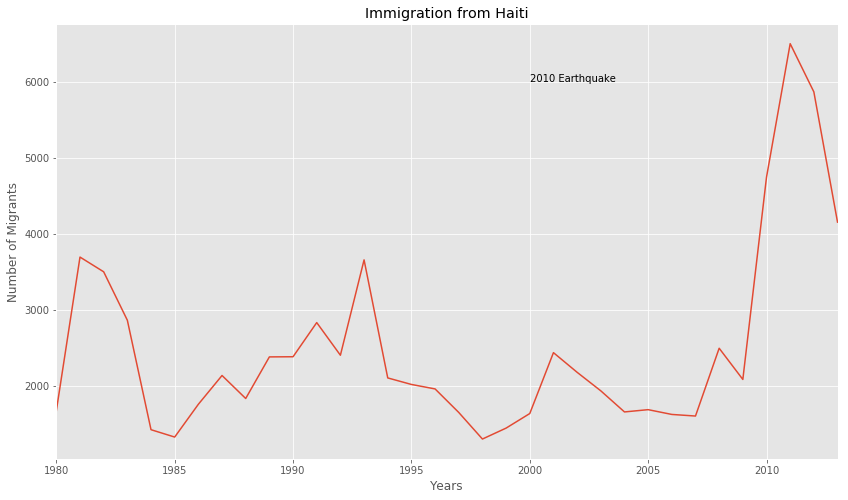

In [115]:
haiti.plot(kind = 'line', figsize = (14, 8))

plt.title("Immigration from Haiti")
plt.xlabel("Years")
plt.ylabel("Number of Migrants")

plt.text(20, 6000, "2010 Earthquake")
plt.show()

In [116]:
df_CI = df_can.loc[['India', 'China'], years]
df_CI.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


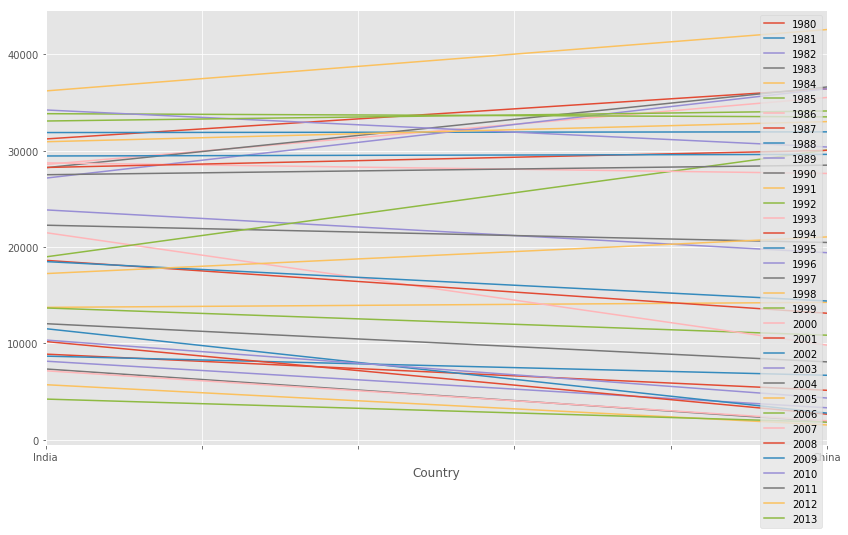

In [117]:
df_CI.plot(kind = 'line', figsize = (14, 8))

In [118]:
df_CI = df_CI.transpose()
df_CI.head()

Country,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


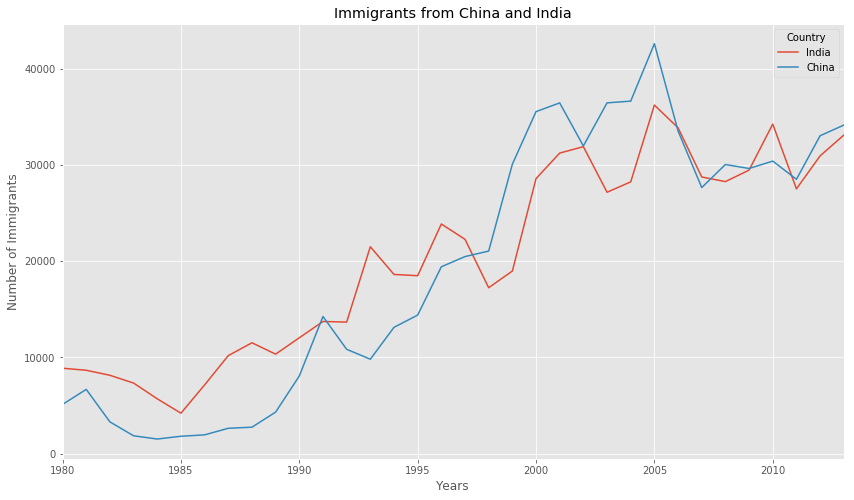

In [119]:
df_CI.plot(kind = 'line', figsize = (14, 8))
plt.title("Immigrants from China and India")
plt.ylabel("Number of Immigrants")
plt.xlabel("Years")
plt.show()

In [120]:
#sort the df_can dataframe in place

df_can.sort_values(by = 'Total', 
                   ascending = False, 
                   axis = 0, 
                   inplace = True)

df_top5 = df_can.head(5)
df_top5 = df_top5[years].transpose()

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


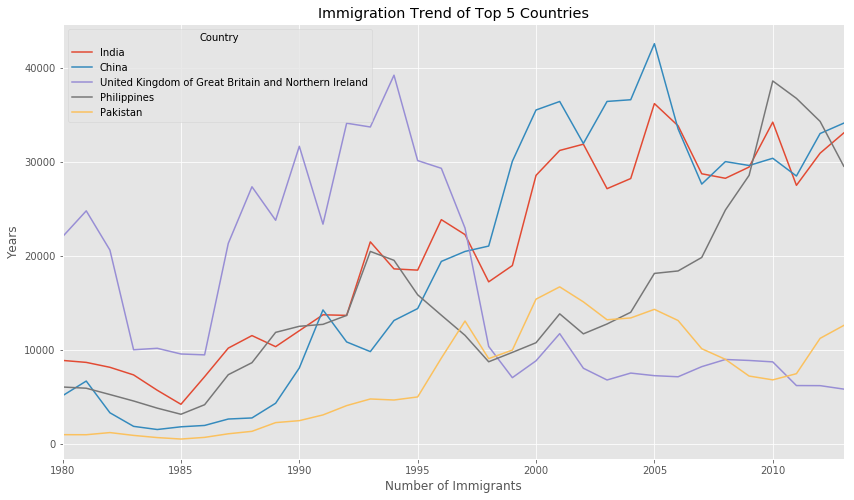

In [121]:
df_top5.plot(kind = 'line', figsize = (14, 8))

plt.title("Immigration Trend of Top 5 Countries")
plt.xlabel("Number of Immigrants")
plt.ylabel("Years")

plt.show()

In [122]:
#to check if all the column names are strings

all(isinstance(column, str) for column in df_can.columns)

True

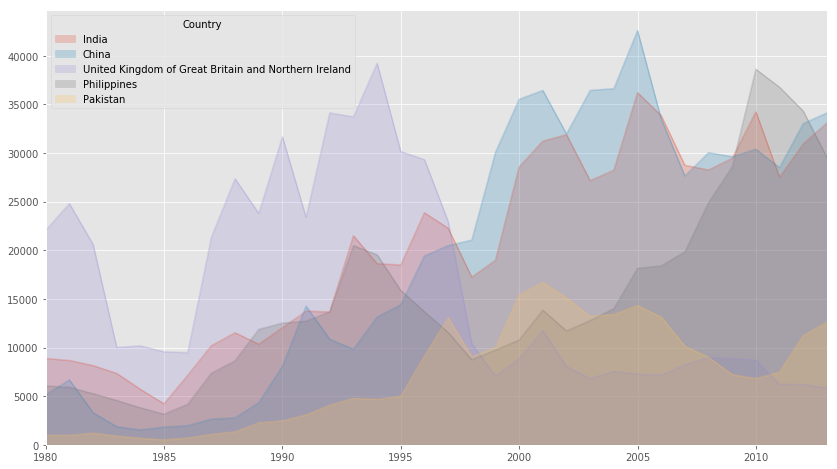

In [123]:
df_top5.plot(kind = 'area',
             stacked = False,
             alpha = 0.25,
             figsize = (14, 8))

In [124]:
df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [125]:
count, bin_ticks = np.histogram(df_can['2013'])
print(count, bin_ticks, sep = '\n')

[178  11   1   2   0   0   0   0   1   2]
[     0.    3412.9   6825.8  10238.7  13651.6  17064.5  20477.4  23890.3
  27303.2  30716.1  34129. ]


Text(0.5,0,'Number of Immigrants')

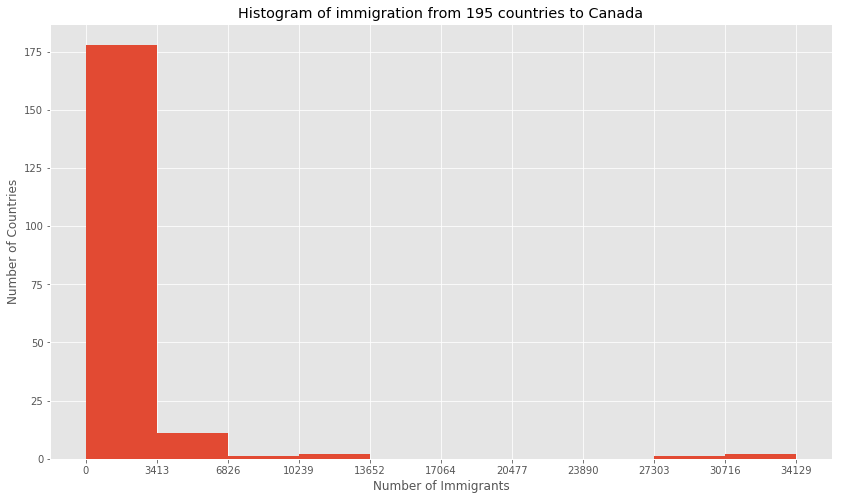

In [126]:
df_can['2013'].plot(kind = 'hist', figsize = (14, 8), xticks = bin_ticks)
plt.title("Histogram of immigration from 195 countries to Canada")
plt.ylabel("Number of Countries")
plt.xlabel("Number of Immigrants")

In [127]:
df_can_oceania = df_can[df_can["Continent"] == "Oceania"]
df_can_oceania_top3 = df_can_oceania.head(3)
df_can_oceania_top3 = df_can_oceania_top3[years].transpose()

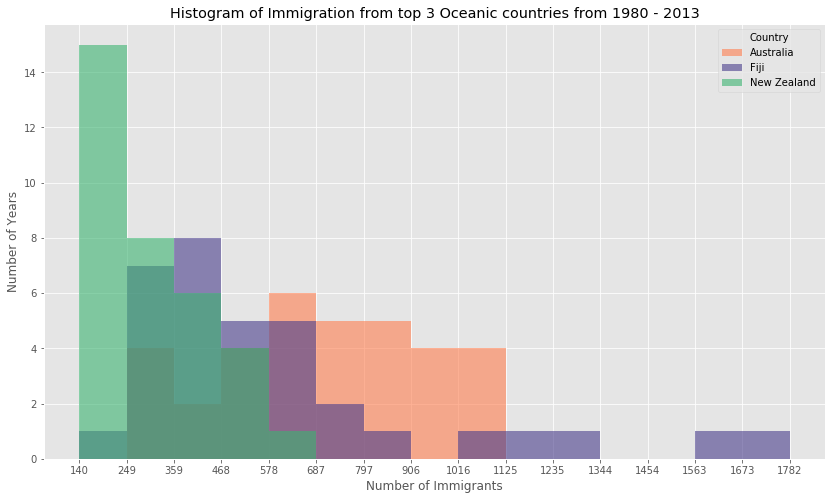

In [128]:
count, bin_ticks = np.histogram(df_can_oceania_top3, 15)

df_can_oceania_top3.plot(kind = "hist",
                         bins = 15,
                         xticks = bin_ticks,
                         alpha = 0.6,
                         stacked = False,
                         color=['coral', 'darkslateblue', 'mediumseagreen'], 
                         figsize = (14, 8))

plt.title('Histogram of Immigration from top 3 Oceanic countries from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

In [129]:
df_continents = df_can.groupby("Continent", axis = 0).sum()

print(type(df_can.groupby("Continent", axis = 0)))

df_continents.head()

<class 'pandas.core.groupby.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


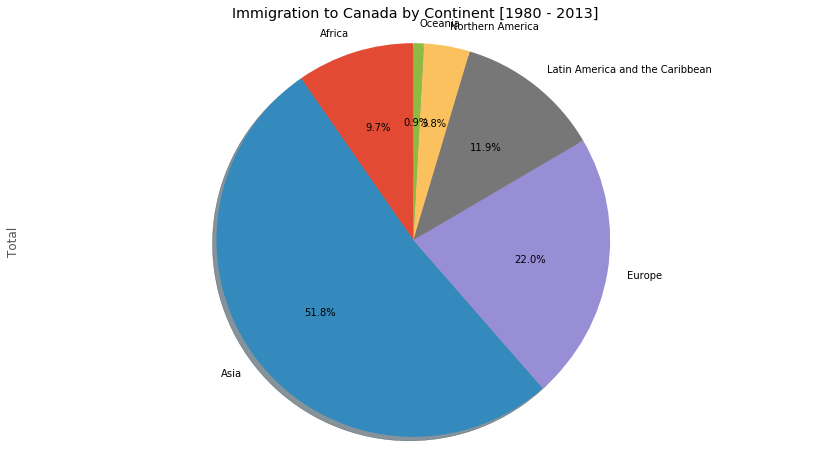

In [130]:
df_continents["Total"].plot(kind = "pie",
                           figsize = (14, 8),
                           autopct = "%1.1f%%",
                           startangle = 90,
                           shadow = True)

plt.title("Immigration to Canada by Continent [1980 - 2013]")
plt.axis("equal")
plt.show()

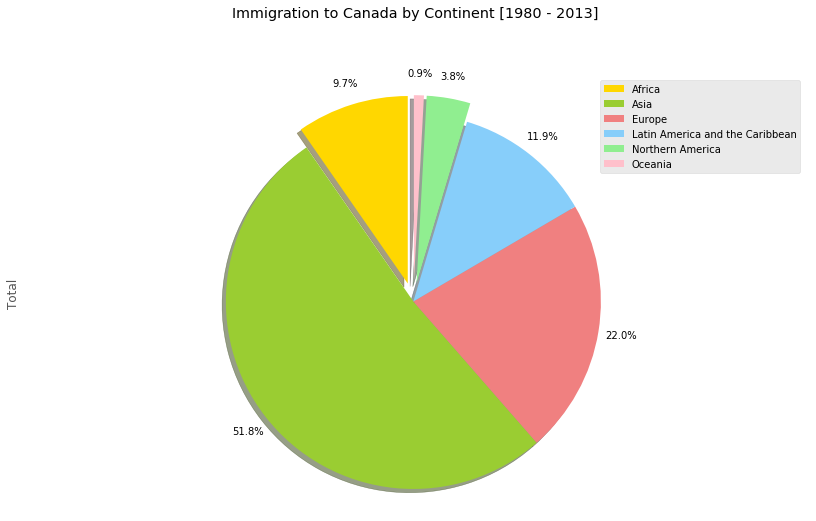

In [131]:
colors_list = ["gold", "yellowgreen", "lightcoral", 
               "lightskyblue", "lightgreen", "pink" ]
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]

df_continents["Total"].plot(kind = "pie", 
                           figsize = (14, 8),
                           autopct = "%1.1f%%",
                           startangle = 90,
                           shadow = True, 
                           labels = None,
                           pctdistance = 1.12,
                           colors = colors_list,
                           explode = explode_list)

plt.title("Immigration to Canada by Continent [1980 - 2013]", y = 1.12)
plt.axis("equal")
plt.legend(labels = df_continents.index, loc = "upper right")
plt.show()

In [132]:
df_india = df_can.loc[["India"], years].transpose()
df_india.head()

Country,India
1980,8880
1981,8670
1982,8147
1983,7338
1984,5704


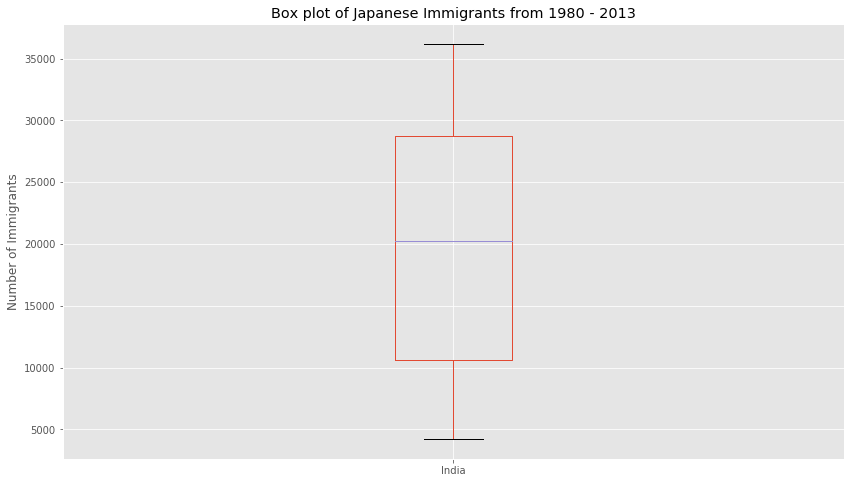

In [133]:
df_india.plot(kind = "box", figsize = (14, 8))

plt.title("Box plot of Japanese Immigrants from 1980 - 2013")
plt.ylabel("Number of Immigrants")

plt.show()

In [134]:
df_india.describe()

Country,India
count,34.000000
mean,20350.117647
std,10007.342579
min,4211.000000
25%,10637.750000
50%,20235.000000
75%,28699.500000
max,36210.000000


In [135]:
df_CI = df_can.loc[["China", "India"], years].transpose()

print(df_CI.head())
df_CI.describe()

Country  China  India
1980      5123   8880
1981      6682   8670
1982      3308   8147
1983      1863   7338
1984      1527   5704


Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


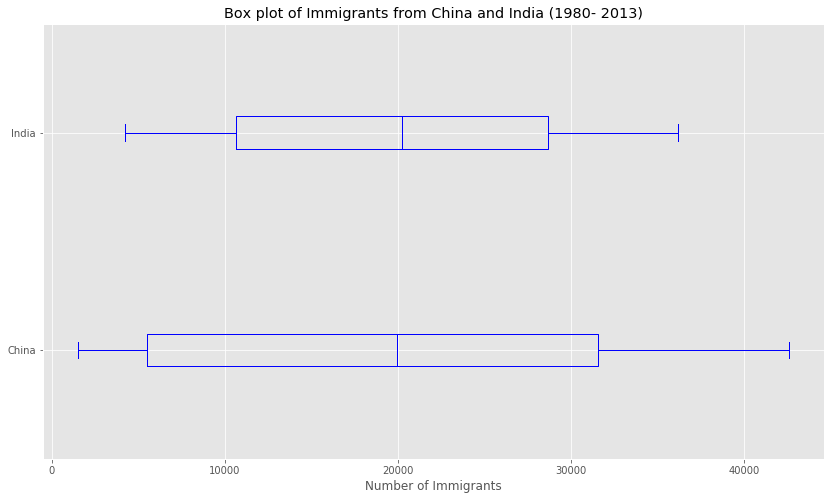

In [136]:
df_CI.plot(kind = "box", 
           figsize = (14, 8), 
           color = "blue", 
           vert = False)
plt.title("Box plot of Immigrants from China and India (1980- 2013)")
plt.xlabel("Number of Immigrants")
plt.show()

Text(0.5,0,'Years')

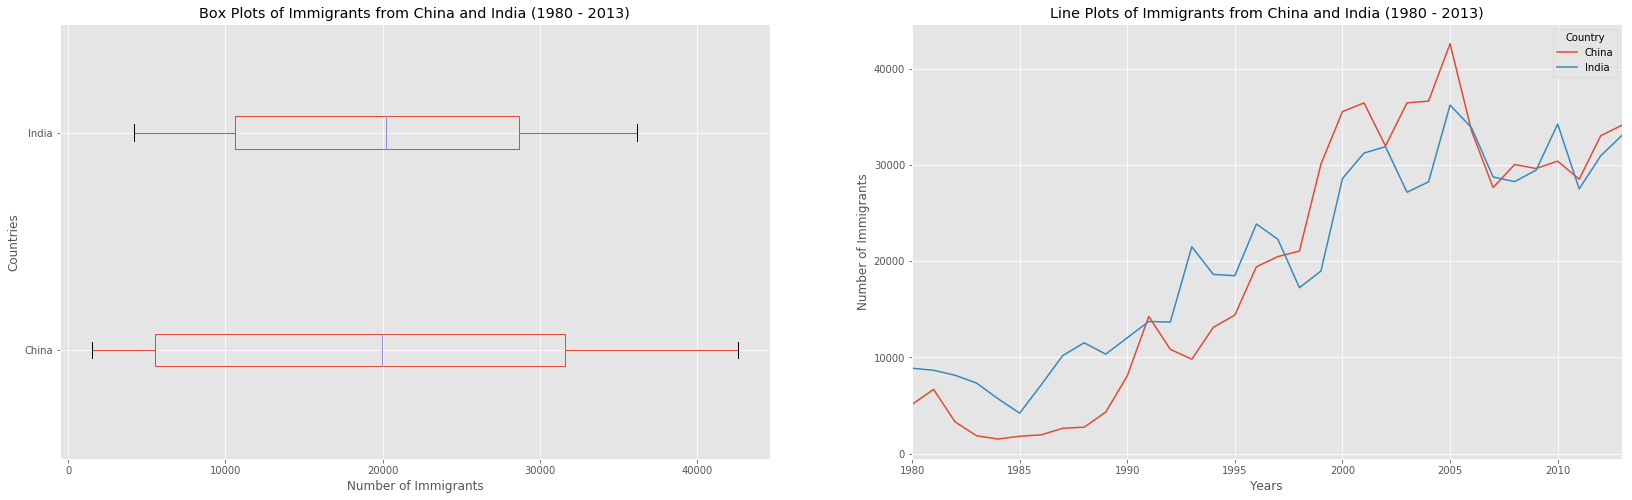

In [137]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#subplot 1
df_CI.plot(kind = "box", vert = False, figsize = (28, 8), ax = ax1)
ax1.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_xlabel('Number of Immigrants')
ax1.set_ylabel('Countries')

#subplot 2
df_CI.plot(kind = "line", figsize = (28, 8), ax = ax2)
ax2.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax2.set_ylabel('Number of Immigrants')
ax2.set_xlabel('Years')

In [138]:
# 1. get the top 15 countries based on Total immigrant population
df_top15 = df_can.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


                                                     1980s   1990s   2000s
Country                                                                   
India                                                82154  180395  303591
China                                                32003  161528  340385
United Kingdom of Great Britain and Northern Ir...  179171  261966   83413
Philippines                                          60764  138482  172904
Pakistan                                             10591   65302  127598
United States of America                             76824   56915   75173
Iran (Islamic Republic of)                           21477   54871   65794
Sri Lanka                                            14796   70421   49678
Republic of Korea                                    16259   38189   68183
Poland                                               57602   64864   13629
Lebanon                                              24918   49245   30906
France                   

Text(0.5,1,'Immigration from top 15 countries for decades 80s, 90s, 00s')

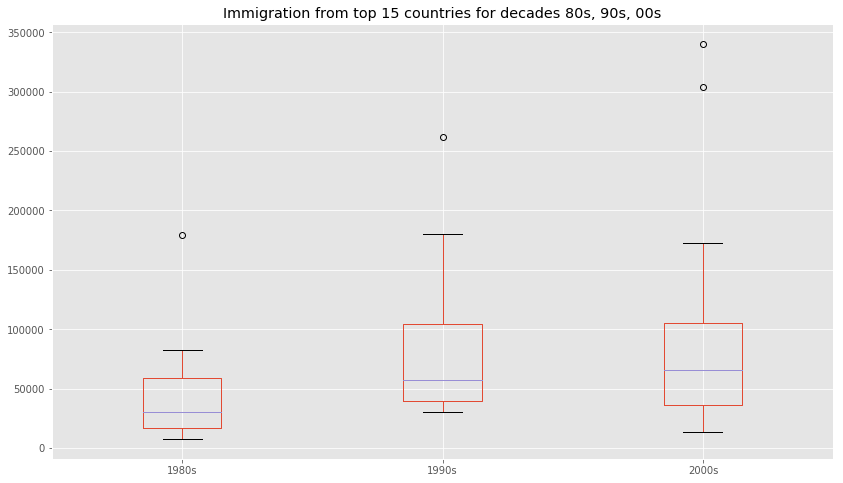

In [139]:
years_80s = list(map(str, range(1980, 1990)))
years_90s = list(map(str, range(1990, 2000)))
years_00s = list(map(str, range(2000, 2010)))

df_80s = df_top15.loc[:, years_80s].sum(axis = 1)
df_90s = df_top15.loc[:, years_90s].sum(axis = 1)
df_00s = df_top15.loc[:, years_00s].sum(axis = 1)

new_df = pd.DataFrame({"1980s": df_80s, "1990s": df_90s, "2000s": df_00s})
print(new_df)
new_df.plot(kind = "box", figsize = (14, 8))
plt.title("Immigration from top 15 countries for decades 80s, 90s, 00s")

In [140]:
df_tot = pd.DataFrame(df_can[years].sum(axis = 0))
df_tot.index = map(float, df_tot.index) #changing to float helps in regression
df_tot.reset_index(inplace = True)
df_tot.columns = ["year", "total"]
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


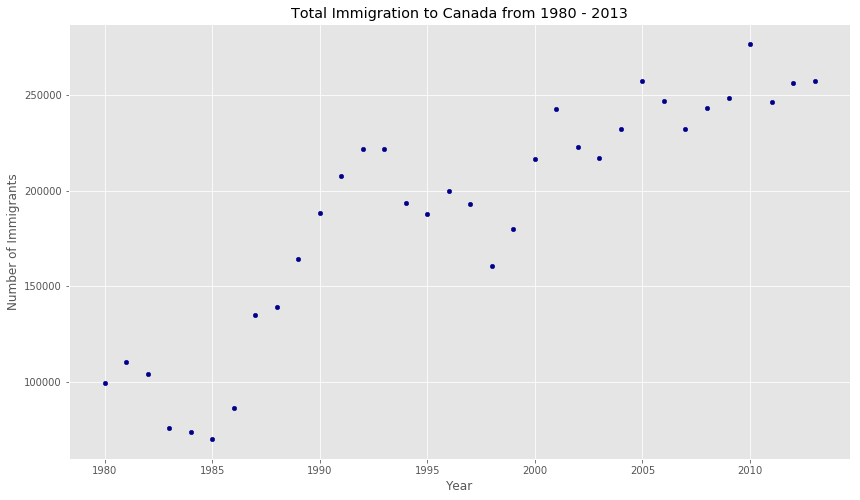

In [141]:
df_tot.plot(kind = "scatter", x = "year", y = "total", figsize = (14, 8), color = "darkblue")
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [142]:
#fit a regression model

x = df_tot["year"]
y = df_tot["total"]

fit = np.polyfit(x, y, deg = 1)
print(fit)

[  5.56709228e+03  -1.09261952e+07]


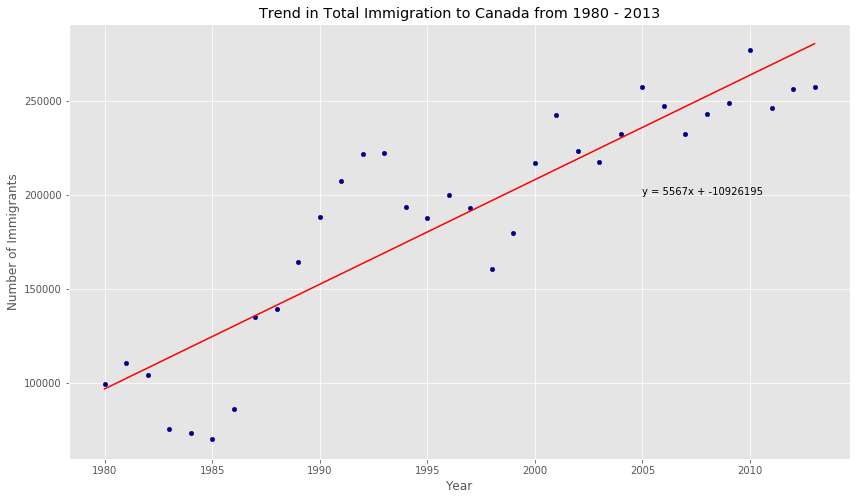

In [143]:
df_tot.plot(kind = "scatter", x = "year", y = "total", figsize = (14, 8), color = "darkblue")

plt.title('Trend in Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

#plot regression
plt.plot(x, fit[0] * x + fit[1], color = "red")
plt.annotate("y = {0:.0f}x + {1:.0f}".format(fit[0], fit[1]), xy = (2005, 200000))
plt.show()


In [144]:
df_can_t = df_can[years].transpose()
df_can_t.index = map(float, df_can_t.index)
df_can_t.index.name = "Year"
df_can_t.reset_index(inplace = True)
df_can_t.head(3)

Country,Year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
0,1980.0,8880,5123,22045,6051,978,9378,1172,185,1011,...,0,0,0,0,0,1,0,0,0,0
1,1981.0,8670,6682,24796,5921,972,10030,1429,371,1456,...,0,0,0,1,1,0,0,0,0,0
2,1982.0,8147,3308,20620,5249,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,0


In [145]:
norm_india = ((df_can_t["India"] - df_can_t["India"].min()) / (df_can_t["India"].max() - df_can_t["India"].min()))
norm_pakistan = ((df_can_t["Pakistan"] - df_can_t["Pakistan"].min()) / (df_can_t["Pakistan"].max() - df_can_t["Pakistan"].min()))

norm_india.head(3)

0    0.145911
1    0.139348
2    0.123004
Name: India, dtype: float64

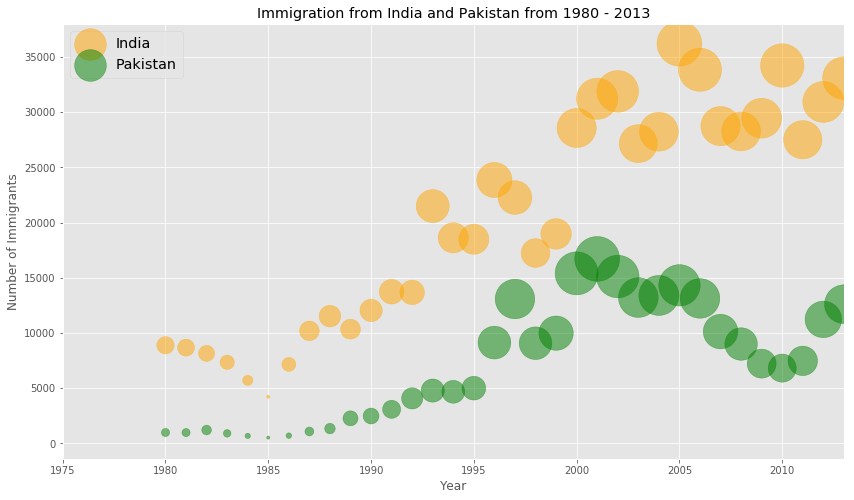

In [146]:
ax0 = df_can_t.plot(kind = "scatter",
                    x = "Year",
                    y = "India",
                    s = norm_india * 2000 + 10, #adding weights to elarge the normalized data points
                    color = "orange",
                    alpha = 0.5,
                    figsize = (14, 8),
                    xlim = (1975, 2013))

ax1 = df_can_t.plot(kind = "scatter",
                    x = "Year",
                    y = "Pakistan",
                    s = norm_pakistan * 2000 + 10,
                    color = "green",
                    alpha = 0.5,
                    figsize = (14, 8),
                    xlim = (1975, 2013),
                    ax = ax0)

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from India and Pakistan from 1980 - 2013')
ax0.legend(['India', 'Pakistan'], loc='upper left', fontsize='x-large')